## Лабароторная работа 1
### Решение краевых задач. Методы коллокаций, наименьших квадратов и Галеркина

In [4]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt


def basis_f(i):
    return sp.Symbol('x')**i*(1 - sp.Symbol('x')**2)

def diff_eq(f, c, d):
    return c*sp.diff(f, sp.Symbol('x'), 2) + (1 + d*sp.Symbol('x')**2)*f + 1

def solve_np(ds, nb):
    a_vec = []
    b_vec = np.zeros(nb)
    for j, discr in enumerate(ds):
        coeffs = discr.as_coefficients_dict()
        a_vec1 = np.zeros(nb)
        for i, el in enumerate(coeffs):
            if not 'a' in str(el):
                b_vec[j] = -coeffs[el]
            else:
                a_vec1[int(str(el)[1:])] = coeffs[el]
        a_vec.append(a_vec1)
    sol_np = np.linalg.solve(a_vec, b_vec)
    return sol_np


def colloc_method(a, b, nb, c=1, d=1):
    x = np.linspace(a, b, nb) # nd must be here, but is extra
    bases = (basis_f(i) for i in range(nb))
    ap_sol = sum(sp.Symbol(f'a{i}')*next(bases) for i in range(nb))
    discreps = (diff_eq(ap_sol, c, d).subs(sp.Symbol('x'), xi) 
                for xi in x) # nb is enough
    sol = solve_np(discreps, nb)
    return ap_sol.subs({f'a{i}': sol[i] for i in range(nb)})

def galerkin_method(a, b, nb, c=1, d=1):
    bases = [basis_f(i) for i in range(nb)]
    ap_sol = sum(sp.Symbol(f'a{i}')*bases[i] for i in range(nb))
    int_bdiscrs = (sp.integrate(diff_eq(ap_sol, c, d)*bas, (sp.Symbol('x'), a, b)).evalf() 
                   for bas in bases) # nb is enough
    sol = solve_np(int_bdiscrs, nb)
    return ap_sol.subs({f'a{i}': sol[i] for i in range(nb)})

def lsq_method(a, b, nd, nb, c=1, d=1):
    x = np.linspace(a, b, nd)
    bases = (basis_f(i) for i in range(nb))
    ap_sol = sum(sp.Symbol(f'a{i}')*next(bases) for i in range(nb))
    sum_discr2 = sum(np.square(diff_eq(ap_sol, c, d).subs(sp.Symbol('x'), xi)) 
                     for xi in x)
    int_discr2 = (sp.diff(sum_discr2, sp.Symbol(f'a{i}')) 
                  for i in range(nb)) # nb is enough
    sol = solve_np(int_discr2, nb)
    return ap_sol.subs({f'a{i}': sol[i] for i in range(nb)})
   
 
def draw(x, y, title, label=None, ylabel='y'):
    plt.plot(x, y, label=label)
    if label is not None:
        plt.legend()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel(ylabel)
    plt.grid(True)
    return plt 

Начальные данные

In [5]:
x0, xn = -1, 1
option = 13
n_dots = int(input('number of dots: '))
n_bases = int(input('number of bases: '))

#### Метод коллокаций
Основное задание

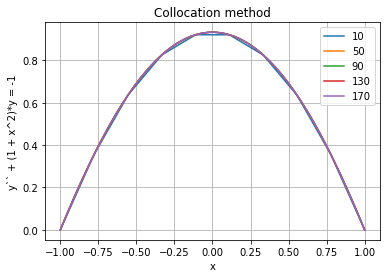

In [18]:
s = colloc_method(x0, xn, n_bases)
for ni in range(10, 200, 40): 
    x = np.linspace(x0, xn, ni)
    y = [s.subs(sp.Symbol('x'), x[i]) for i in range(ni)]
    draw(x, y, 'Collocation method', len(x), 'y`` + (1 + x^2)*y = -1')
plt.show()

Задание по вариантам

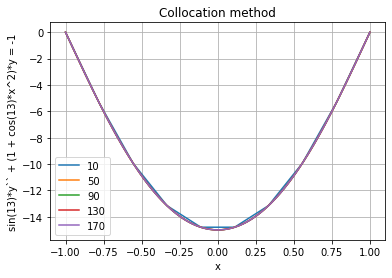

In [10]:
s = colloc_method(x0, xn, n_bases, np.sin(option), np.cos(option))
for ni in range(10, 200, 40): 
    x = np.linspace(x0, xn, ni)
    y = [s.subs(sp.Symbol('x'), x[i]) for i in range(ni)]
    draw(x, y, 'Collocation method', len(x), f'sin({option})*y`` + (1 + cos({option})*x^2)*y = -1')
plt.show()

Усложненная версия

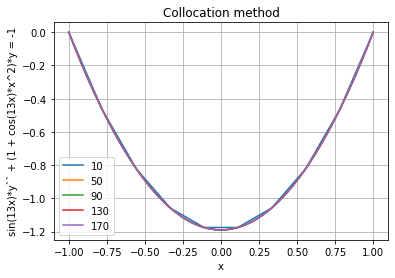

In [11]:
s = colloc_method(x0, xn, 1, sp.sin(option*sp.Symbol('x')), sp.cos(option*sp.Symbol('x')))
for ni in range(10, 200, 40): 
    x = np.linspace(x0, xn, ni)
    y = [s.subs(sp.Symbol('x'), x[i]) for i in range(ni)]
    draw(x, y, 'Collocation method', len(x), f'sin({option}x)*y`` + (1 + cos({option}x)*x^2)*y = -1')
plt.show()

#### Метод Галеркина
Основное задание

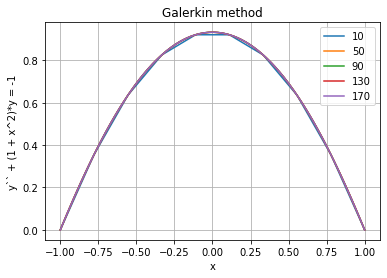

In [12]:
s = galerkin_method(x0, xn, n_bases)
for ni in range(10, 200, 40): 
    x = np.linspace(x0, xn, ni)
    y = [s.subs(sp.Symbol('x'), x[i]) for i in range(ni)]
    draw(x, y, 'Galerkin method', len(x), 'y`` + (1 + x^2)*y = -1')
plt.show()

Задание по вариантам

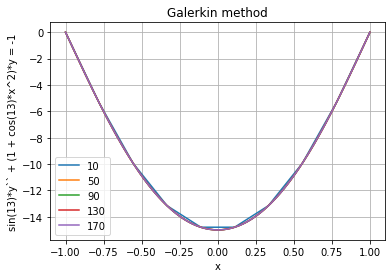

In [13]:
s = galerkin_method(x0, xn, n_bases, np.sin(option), np.cos(option))
for ni in range(10, 200, 40): 
    x = np.linspace(x0, xn, ni)
    y = [s.subs(sp.Symbol('x'), x[i]) for i in range(ni)]
    draw(x, y, 'Galerkin method', len(x), f'sin({option})*y`` + (1 + cos({option})*x^2)*y = -1')
plt.show()

Усложненная версия

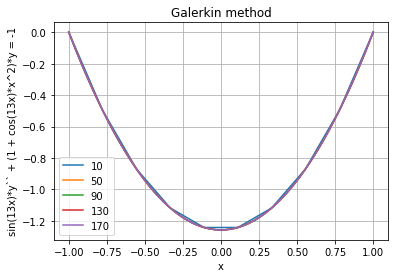

In [14]:
s = galerkin_method(x0, xn, 1, sp.sin(option*sp.Symbol('x')), sp.cos(option*sp.Symbol('x')))
for ni in range(10, 200, 40): 
    x = np.linspace(x0, xn, ni)
    y = [s.subs(sp.Symbol('x'), x[i]) for i in range(ni)]
    draw(x, y, 'Galerkin method', len(x), f'sin({option}x)*y`` + (1 + cos({option}x)*x^2)*y = -1')
plt.show()

#### Наименьших квадратов
Основное задание

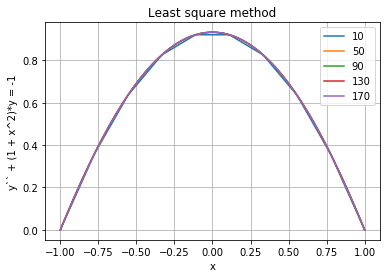

In [15]:
s = lsq_method(x0, xn, n_dots, n_bases)
for ni in range(10, 200, 40): 
    x = np.linspace(x0, xn, ni)
    y = [s.subs(sp.Symbol('x'), x[i]) for i in range(ni)]
    draw(x, y, 'Least square method', len(x), f'y`` + (1 + x^2)*y = -1')
plt.show()

Задание по вариантам

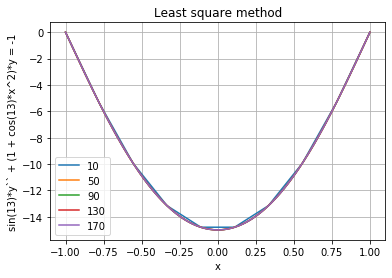

In [16]:
s = lsq_method(x0, xn, n_dots, n_bases, np.sin(option), np.cos(option))
for ni in range(10, 200, 40): 
    x = np.linspace(x0, xn, ni)
    y = [s.subs(sp.Symbol('x'), x[i]) for i in range(ni)]
    draw(x, y, 'Least square method', len(x), f'sin({option})*y`` + (1 + cos({option})*x^2)*y = -1')
plt.show()


Усложненная версия

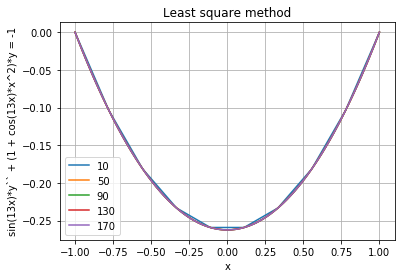

In [17]:
s = lsq_method(x0, xn, n_dots, 1, sp.sin(option*sp.Symbol('x')), sp.cos(option*sp.Symbol('x')))
for ni in range(10, 200, 40): 
    x = np.linspace(x0, xn, ni)
    y = [s.subs(sp.Symbol('x'), x[i]) for i in range(ni)]
    draw(x, y, 'Least square method', len(x), f'sin({option}x)*y`` + (1 + cos({option}x)*x^2)*y = -1')
plt.show()
